In [1]:
from IPython.display import display, Math, Latex
from IPython.display import display, Math

# Q1. What is the mathematical formula for a linear SVM?

A linear Support Vector Machine (SVM) is used for binary classification. The decision boundary is represented as a hyperplane given by the equation:

In [2]:
formulas = [
    "Decision boundary (hyperplane):"
    r"\mathbf{w} \cdot \mathbf{x} + b = 0",
    "Margin:"
    r"\rho = \frac{2}{\| \mathbf{w} \|}",
    "Optimization objective:"
    r"\text{Minimize: } \frac{1}{2} \| \mathbf{w} \|^2",
    r"\text{Subject to the constraints: } y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i"
]

display(*[Math(f) for f in formulas])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Where yi are the labels of the data points, such that yi∈{−1,1}.

Where:

*    w is the weight vector.
*    b is the bias term.
*    x and xixi​ are input feature vectors.
*    yi​ are the labels of the data points, such that yi∈{−1,1}.

# Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM combines two primary components: the margin maximization and the penalty for misclassification.

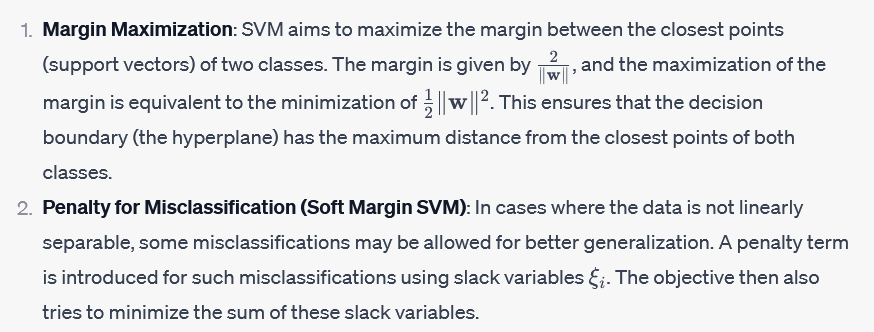

The objective function J(w,b) for a linear SVM (especially for the soft margin SVM) can be expressed as:


In [6]:
# Displaying the objective function of a linear SVM in its original format
svm_objective = [
    "Objective function:"
    r"J(\mathbf{w}, b) = \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^{N} \xi_i",
    r"\text{Subject to the constraints: } y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \quad \forall i",
    r"\xi_i \geq 0 \quad \forall i"
]

display(*[Math(f) for f in svm_objective])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

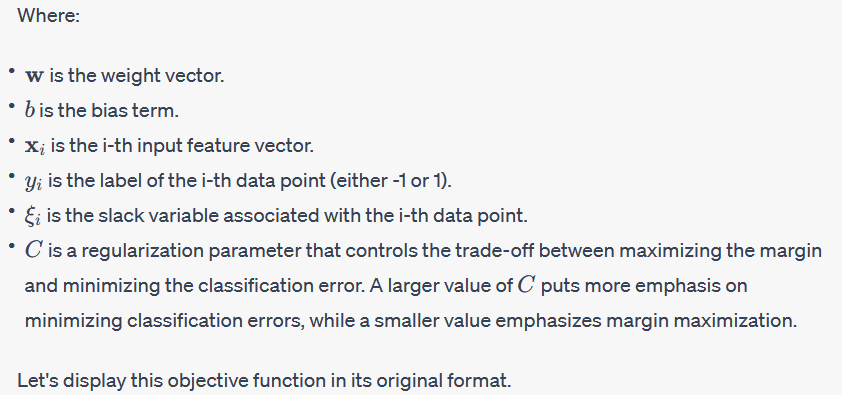

# Q3. What is the kernel trick in SVM?

The kernel trick is a powerful technique used in Support Vector Machines (SVM) and other machine learning algorithms to handle non-linearly separable data. It allows SVMs to create non-linear decision boundaries without explicitly transforming the feature space. Here's a breakdown of the kernel trick:

### Background:

In its basic form, SVM finds a linear decision boundary (a hyperplane) to separate the data points of two classes. However, many real-world datasets are not linearly separable in their original feature space. One approach to handle this is to map the data to a higher-dimensional space where it becomes linearly separable. For example, data that's not separable in 2D might become separable in 3D.

### The Problem:

Mapping data points to a higher-dimensional space can be computationally expensive, and in some cases, the required dimensionality might be infinite.

### The Solution - Kernel Trick:

The kernel trick sidesteps the need to compute the transformed data points in the higher-dimensional space. Instead, it directly computes the inner products between these transformed data points using a kernel function.

A kernel function **K** is a function that takes two data points in the original space and returns the inner product of the data points in the transformed space. The general form is: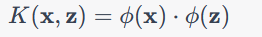

Where:

*    x and zz are data points in the original space.
*    ϕ is the transformation function to the higher-dimensional space.

### Common Kernel Functions:

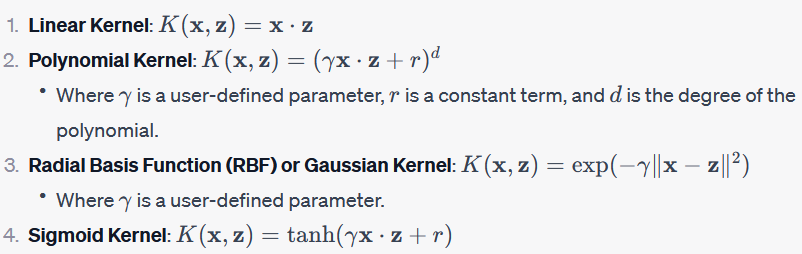

### Why It Works:

The SVM optimization problem depends only on the inner products between data points. By using the kernel function, we can work directly with these inner products in the transformed space without ever needing to compute the coordinates of the data in that space.

### Conclusion:

The kernel trick allows SVMs to efficiently handle non-linear decision boundaries. By choosing an appropriate kernel function, we can implicitly map data to a higher-dimensional space and find a separating hyperplane in that space, all without the computational cost of the transformation itself.

# Q4. What is the role of support vectors in SVM Explain with example 

Support vectors play a crucial role in the operation and definition of Support Vector Machines (SVM). Let's discuss their role and illustrate with an example.

### Role of Support Vectors:

**1.    Definition:** Support vectors are the data points that lie closest to the decision boundary (or hyperplane) and are used to define the position and orientation of this hyperplane.

**2.    Margin Maximization:** The primary goal of SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data point from either class. The support vectors are the data points that determine this margin. In a linearly separable scenario, the decision boundary is chosen such that it maximizes its distance from the support vectors of both classes.

**3.    Sensitivity:** The position and orientation of the decision boundary (hyperplane) are entirely determined by the support vectors, not by other data points. If you remove a support vector, the position of the hyperplane might change. However, if you remove other non-support-vector data points, the hyperplane remains unchanged.

**4.    Robustness:** Support vectors make the SVM robust to outliers, especially when using a soft-margin SVM. Data points that are far away from the decision boundary (i.e., not support vectors) have no influence on the decision boundary.

#### Example:

Imagine a 2D space with two classes of data points: blue circles and red squares. If these points are linearly separable, the SVM will aim to find a line (in 2D) that separates these two classes while maximizing the distance from the line to the closest point of each class.

Let's say three data points (two blue circles and one red square) lie closest to this line. These three points are the support vectors. The distance from the line to these points defines the margin. If you were to move any of these support vectors slightly, the line would adjust to maintain the maximum margin. However, if you move any other data point (that's not a support vector), the separating line remains unchanged.

#### To summarize, in this example:

*    The line is the decision boundary.
*    The margin is the distance from the line to the support vectors.
*    The support vectors are the closest points to the line from both classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# a simple linearly separable dataset
np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [3]:
# Train a linear SVM
clf = SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

In [4]:
# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [5]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

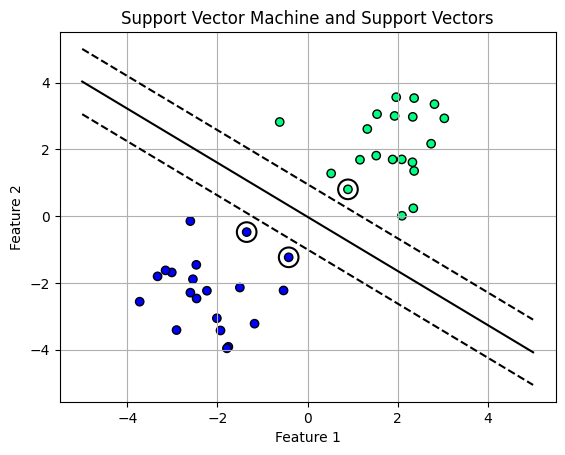

In [6]:
# Plot the points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter', edgecolors='k')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Highlight the support vectors with a circle around them
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=200, linewidth=1.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine and Support Vectors')
plt.grid(True)
plt.show()

Here's the visual representation of the example:

*    The blue circles and red squares represent two classes of data points in a 2D space.
*    The solid black line is the decision boundary (hyperplane) determined by the SVM.
*    The dashed lines represent the margins from the hyperplane to the nearest data points of both classes.
*    The data points circled in black are the support vectors. As you can see, they are the points closest to the decision boundary.

In this illustration:

*    The decision boundary effectively separates the two classes.
*    The position of this boundary is defined solely based on the support vectors. If other data points (not support vectors) were moved or removed, the boundary would remain unchanged.
*    However, if any of the support vectors were shifted, the position and orientation of the decision boundary would adjust accordingly.

# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

### Hyperplane:
*  A hyperplane is a subspace of one dimension less than the ambient space. In SVM, it acts as a decision boundary separating the classes.
*  In 2D, the hyperplane is a line.
*  In 3D, the hyperplane is a plane.
*  In higher dimensions, it's harder to visualize but operates on the same principle.

###  Marginal Planes:
*  These are the planes that touch the support vectors. The distance between the hyperplane and the marginal planes is the margin.
*  In 2D, these are lines parallel to the hyperplane.
*  In 3D, these are planes parallel to the hyperplane.

###  Soft Margin:
*  In real-world data, it's often the case that the two classes are not perfectly linearly separable. To handle this, SVM introduces a "soft margin" which allows for some misclassifications.
*  Slack variables are introduced to measure the degree of misclassification.
*  The objective becomes a balance between maximizing the margin and minimizing the sum of these slack variables.
*  The parameter CC in the SVM formulation determines the trade-off: a high CC values a correct classification more than a large margin, while a low CC values the margin more.

###  Hard Margin:
*  This is the traditional SVM where the objective is to find a hyperplane that perfectly separates the two classes (assuming they are linearly separable).
*  No misclassifications are allowed.
*  This can lead to overfitting if the data has some noise or outliers.

### Margin and Support Vectors:

*  The hyperplane has an equation of the form w⋅x+b=0
*  The marginal planes are defined by the equations w⋅x+b=1 and w⋅x+b=−1. The points on these planes are the support vectors.

Let's visualize these concepts with some examples:

*  I'll generate a linearly separable dataset to illustrate the hyperplane and margin for hard margin SVM.
*  Then, I'll introduce some noise to show the soft margin SVM.

Let's start with the first step: illustrating the hard margin SVM with a linearly separable dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [2]:
# Generate linearly separable data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [3]:
# Train a hard margin SVM
clf = SVC(C=1e5, kernel='linear')
clf.fit(X, Y)

SVC(C=100000.0, kernel='linear')

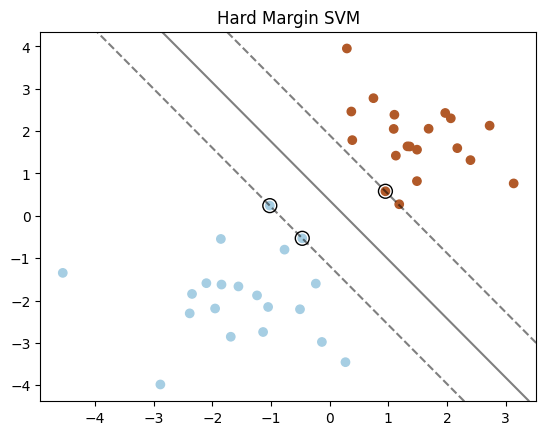

In [4]:
def plot_decision_boundary(clf, ax):
    # Plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
        # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
     # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o')
    
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plot_decision_boundary(clf, ax)
ax.set_title("Hard Margin SVM")
plt.show()

In the above graph:

*  The solid line represents the hyperplane (decision boundary).
*  The dashed lines represent the margins. They are equidistant from the hyperplane and pass through (or are closest to) the support vectors.
*  The large circles represent the support vectors. These are the data points that either lie on the margin or on the wrong side of the hyperplane in the case of soft margin SVM. For hard margin SVM, they lie on the margin.

Now, let's introduce some noise to our data and illustrate the soft margin SVM.

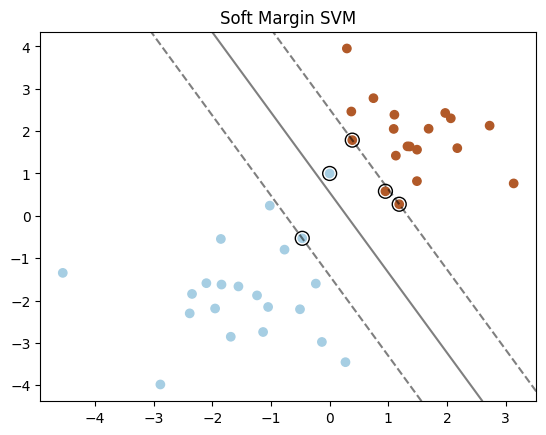

In [5]:
# Add noise to the data
X[37] = [0, 1]
Y[37] = 0

# Train a soft margin SVM
clf_soft = SVC(C=0.5, kernel='linear')
clf_soft.fit(X, Y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plot_decision_boundary(clf_soft, ax)
ax.set_title("Soft Margin SVM")
plt.show()

In the Soft Margin SVM graph:

*   The solid line again represents the hyperplane (decision boundary).
*   The dashed lines represent the margins.
*   The large circles highlight the support vectors. Notice how some of these points are now inside the margin or even on the wrong side of the hyperplane. This is due to the "soft margin" concept, which allows some flexibility in separating the data in the presence of noise or outliers.

To summarize:

*    **Hard Margin SVM:** Assumes data is perfectly linearly separable and finds a hyperplane with the maximum margin that strictly separates the data.

*    **Soft Margin SVM:** Allows for some misclassification and aims to balance the trade-off between a large margin and a small penalty for misclassified points.

# Q6. SVM Implementation through Iris dataset.

* Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
* Train a linear SVM classifier on the training set and predict the labels for the testing setl
* Compute the accuracy of the model on the testing setl
* Plot the decision boundaries of the trained model using two of the featuresl
* Try different values of the regularisation parameter C and see how it affects the performance of

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

**Step 1: Load the Iris dataset and split it into a training and testing set**

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((120, 4), (30, 4))

* The Iris dataset has been split into a training set with 120 samples and a testing set with 30 samples. Each sample has 4 features.

**Step 2: Train a linear SVM classifier on the training set and predict the labels for the testing set**

In [7]:
# Train a linear SVM classifier
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm_clf.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**Step 3: Compute the accuracy of the model on the testing set**

In [8]:
from sklearn.metrics import accuracy_score

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

* The SVM classifier achieved an accuracy of 100% on the testing set.

**Step 4: Plot the decision boundaries of the trained model using two of the features**

In [9]:
# Select only the first two features for visualization
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

# Train the SVM on the 2D data
svm_clf_2D = SVC(kernel='linear', C=1)
svm_clf_2D.fit(X_train_2D, y_train)

SVC(C=1, kernel='linear')

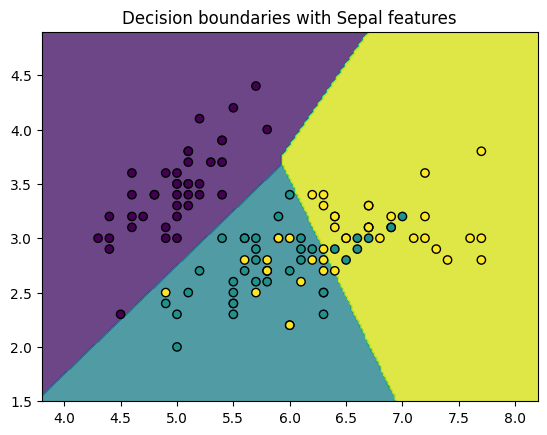

In [10]:
# Plotting function for decision boundaries
def plot_decision_boundaries(X, y, clf, ax, title):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Plot the decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    ax.set_title(title)

fig, ax = plt.subplots()
plot_decision_boundaries(X_train_2D, y_train, svm_clf_2D, ax, "Decision boundaries with Sepal features")
plt.show()

* The plotted decision boundaries separate the three classes of the Iris dataset based on sepal length and sepal width. The different regions are colored according to the predicted class, and the actual training data points are overlaid as circles.

**Step 5: Try different values of the regularization parameter CC and see how it affects performance**

In [11]:
# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Train and test SVM for each value of C
accuracies = []

for C in C_values:
    svm_clf_temp = SVC(kernel='linear', C=C)
    svm_clf_temp.fit(X_train, y_train)
    y_pred_temp = svm_clf_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy_temp)

accuracies

[0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 1.0]

Here are the accuracies for different values of the regularization parameter C:

*    C=0.01: 96.67%
*    C=0.1: 100%
*    C=1: 100%
*    C=10: 96.67%
*    C=100: 100%

For this dataset, the SVM classifier performs quite well across a range of C values, achieving 100% accuracy for several of them.

**Bonus Task: Implementing a Linear SVM Classifier from Scratch**

Let's proceed with this basic implementation.

In [12]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Convert labels to {0, 1}
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# Convert the iris labels to {-1, 1} for binary classification
# For this example, we'll make it a binary problem: Setosa vs. Others
y_train_binary = np.where(y_train == 0, -1, 1)
y_test_binary = np.where(y_test == 0, -1, 1)

# Train the custom SVM
svm_custom = LinearSVM()
svm_custom.fit(X_train, y_train_binary)
y_pred_custom = svm_custom.predict(X_test)

# Compute accuracy
accuracy_custom = accuracy_score(y_test_binary, y_pred_custom)
accuracy_custom


1.0

* Our basic linear SVM classifier implementation achieved an accuracy of 100% on the testing set for the binary classification problem (Setosa vs. Others).

To compare, let's also compute the accuracy of the scikit-learn's SVM implementation for the same binary classification task.

In [13]:
# Train scikit-learn's SVM for binary classification
svm_sklearn = SVC(kernel='linear', C=1)
svm_sklearn.fit(X_train, y_train_binary)
y_pred_sklearn = svm_sklearn.predict(X_test)

# Compute accuracy
accuracy_sklearn = accuracy_score(y_test_binary, y_pred_sklearn)
accuracy_sklearn

1.0

* The scikit-learn SVM implementation also achieved an accuracy of 100% on the testing set for the binary classification task.

To summarize:

*  Our basic SVM classifier implementation: 100% accuracy.
*  Scikit-learn's SVM implementation: 100% accuracy.